In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a62dd5aa054cb51e22ba32fb68aef5a0


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | visnes
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | olinda
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | chissamba
Processing Record 9 of Set 1 | catungawan
City not found. Skipping...
Processing Record 10 of Set 1 | teya
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | sorland
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | isangel
Processing Record 17 of Set 1 | umm lajj
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | pangnirtung
Processing Record 20 of Set 1 | mirador
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | ahipara
Processing Record 23 of S

Processing Record 39 of Set 4 | zhigansk
Processing Record 40 of Set 4 | karatau
Processing Record 41 of Set 4 | port blair
Processing Record 42 of Set 4 | dunedin
Processing Record 43 of Set 4 | cabedelo
Processing Record 44 of Set 4 | kaitangata
Processing Record 45 of Set 4 | grand centre
City not found. Skipping...
Processing Record 46 of Set 4 | axim
Processing Record 47 of Set 4 | richards bay
Processing Record 48 of Set 4 | edirne
Processing Record 49 of Set 4 | prieska
Processing Record 50 of Set 4 | cuamba
Processing Record 1 of Set 5 | kotido
Processing Record 2 of Set 5 | rungata
City not found. Skipping...
Processing Record 3 of Set 5 | la romana
Processing Record 4 of Set 5 | phan rang
City not found. Skipping...
Processing Record 5 of Set 5 | rincon
Processing Record 6 of Set 5 | zinder
Processing Record 7 of Set 5 | severo-kurilsk
Processing Record 8 of Set 5 | biak
Processing Record 9 of Set 5 | alice springs
Processing Record 10 of Set 5 | matara
Processing Record 11 o

Processing Record 28 of Set 8 | khairagarh
Processing Record 29 of Set 8 | portland
Processing Record 30 of Set 8 | berlevag
Processing Record 31 of Set 8 | neiafu
Processing Record 32 of Set 8 | henties bay
Processing Record 33 of Set 8 | moyale
Processing Record 34 of Set 8 | eureka
Processing Record 35 of Set 8 | boyolangu
Processing Record 36 of Set 8 | warqla
City not found. Skipping...
Processing Record 37 of Set 8 | eyl
Processing Record 38 of Set 8 | labuhan
Processing Record 39 of Set 8 | kaili
Processing Record 40 of Set 8 | chifeng
Processing Record 41 of Set 8 | rio grande
Processing Record 42 of Set 8 | baykit
Processing Record 43 of Set 8 | deori khas
Processing Record 44 of Set 8 | cidreira
Processing Record 45 of Set 8 | coquimbo
Processing Record 46 of Set 8 | severnoye
Processing Record 47 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 48 of Set 8 | le mars
Processing Record 49 of Set 8 | bairnsdale
Processing Record 50 of Set 8 | rocha
Processing 

Processing Record 16 of Set 12 | santa cruz cabralia
Processing Record 17 of Set 12 | sidi bu zayd
City not found. Skipping...
Processing Record 18 of Set 12 | grande prairie
Processing Record 19 of Set 12 | languyan
Processing Record 20 of Set 12 | valparaiso
Processing Record 21 of Set 12 | naron
Processing Record 22 of Set 12 | hervey bay
Processing Record 23 of Set 12 | maua
Processing Record 24 of Set 12 | cockburn town
Processing Record 25 of Set 12 | kloulklubed
Processing Record 26 of Set 12 | novyy redant
City not found. Skipping...
Processing Record 27 of Set 12 | montrose
Processing Record 28 of Set 12 | santa ana
Processing Record 29 of Set 12 | front royal
Processing Record 30 of Set 12 | casambalangan
Processing Record 31 of Set 12 | batagay-alyta
Processing Record 32 of Set 12 | erdenet
Processing Record 33 of Set 12 | satipo
Processing Record 34 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 35 of Set 12 | lipin bor
Processing Record 36 of Set 12 | sa

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,7.00,43,20,10.36,CA,2021-03-29 22:20:43
1,Visnes,59.3556,5.2242,45.00,100,90,10.36,NO,2021-03-29 22:22:31
2,Hilo,19.7297,-155.0900,75.20,73,75,3.44,US,2021-03-29 22:22:31
3,Vaini,-21.2000,-175.2000,82.40,89,40,8.05,TO,2021-03-29 22:22:32
4,Cape Town,-33.9258,18.4232,63.00,82,0,6.91,ZA,2021-03-29 22:18:03
5,Olinda,-8.0089,-34.8553,80.60,74,75,6.91,BR,2021-03-29 22:22:32
6,East London,-33.0153,27.9116,69.12,86,99,17.49,ZA,2021-03-29 22:22:32
7,Chissamba,-12.1667,17.3333,63.12,98,100,0.83,AO,2021-03-29 22:22:33
8,Teya,60.3778,92.6267,8.01,99,100,1.03,RU,2021-03-29 22:21:15
9,Barrow,71.2906,-156.7887,-2.20,65,1,24.16,US,2021-03-29 22:22:33


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order] 

In [17]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-03-29 22:20:43,62.4560,-114.3525,7.00,43,20,10.36
1,Visnes,NO,2021-03-29 22:22:31,59.3556,5.2242,45.00,100,90,10.36
2,Hilo,US,2021-03-29 22:22:31,19.7297,-155.0900,75.20,73,75,3.44
3,Vaini,TO,2021-03-29 22:22:32,-21.2000,-175.2000,82.40,89,40,8.05
4,Cape Town,ZA,2021-03-29 22:18:03,-33.9258,18.4232,63.00,82,0,6.91
...,...,...,...,...,...,...,...,...,...
568,Solnechnyy,RU,2021-03-29 22:25:10,50.7214,136.6319,27.39,89,88,7.67
569,Sharjah,AE,2021-03-29 22:22:05,25.3573,55.4033,72.00,78,0,8.05
570,Bontang,ID,2021-03-29 22:25:11,0.1333,117.5000,76.05,90,100,5.88
571,Poquoson,US,2021-03-29 22:25:11,37.1224,-76.3458,62.01,47,1,5.75


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

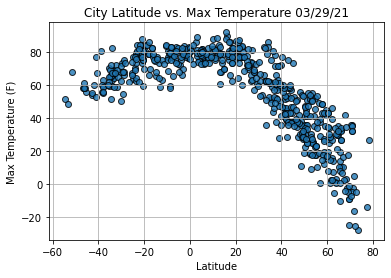

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

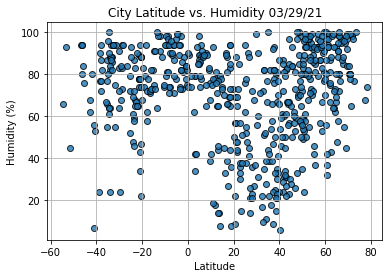

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

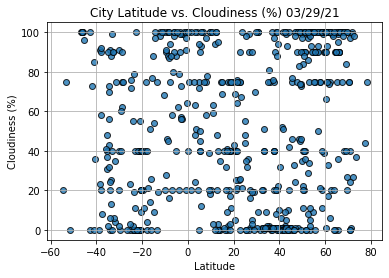

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

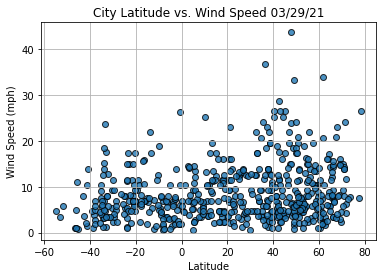

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()